In [350]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import ImageManipulation as IM
import os
from importlib import reload
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [452]:
IM.processLifetimeImage?

header dir already exists
b'N:\\Singlem\\singlem19-4\\November\\15_CD95_NB_NV\\all\\header\\CD95-DeltaDD-2+L5.txt'
number of records is 26219772
dwelltime not found in header, using user-set value


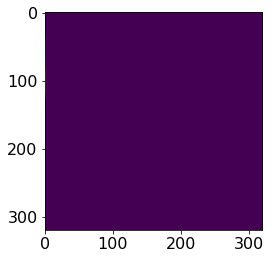

In [455]:
plt.imshow(example_cell.baseIntensity.G)

In [ ]:
wdir = r'N:\Singlem\singlem19-4\November\15_CD95_NB_NV\all'
relpath = r'cell_analysis\cell_heterogeneities.csv'
fname = os.path.join(wdir, fname)
celldat = np.genfromtxt(fname, skip_header = 1, delimiter = ',', dtype = None)

In [118]:
Donlycols = np.arange(0,3)
batch1cols = np.arange(3,20)
batch2cols = np.arange(20,42)
batch3cols = np.arange(42,62)


In [119]:
celldat['f0'][batch1cols]

array([b'CD95_DDD_batch1-L2', b'CD95_DDD_batch1-L3',
       b'CD95_DDD_batch1+L5', b'CD95_DDD_batch1+L6',
       b'CD95_DDD_batch1+L7', b'CD95_DDD_batch1+L8',
       b'CD95_DDD_batch1+L8-2', b'CD95_DDD_batch1+L9',
       b'CD95_DDD_batch1+L10', b'CD95_DDD_batch1+L11',
       b'CD95_DDD_batch1+L12', b'CD95_DDD_batch1+L13',
       b'CD95_DDD_batch1+L14', b'CD95_DDD_batch1+L15',
       b'CD95_DDD_batch1+L16', b'CD95_DDD_batch1+L17',
       b'CD95_DDD_batch1+L18'], dtype='|S20')

<function matplotlib.pyplot.show(*args, **kw)>

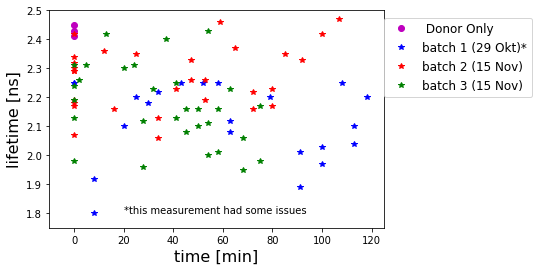

In [155]:
plt.plot(celldat['f1'][Donlycols], celldat['f2'][Donlycols], 'om', label = ' Donor Only')
plt.plot(celldat['f1'][batch1cols], celldat['f2'][batch1cols], '*b', label = 'batch 1 (29 Okt)*')
#add secondary population
plt.plot(celldat['f1'][batch1cols], celldat['f5'][batch1cols], '*b')
plt.plot(celldat['f1'][batch2cols], celldat['f2'][batch2cols], '*r', label = 'batch 2 (15 Nov)')
#add secondary population
plt.plot(celldat['f1'][batch2cols], celldat['f5'][batch2cols], '*r')
plt.plot(celldat['f1'][batch3cols], celldat['f2'][batch3cols], '*g', label = 'batch 3 (15 Nov)')
#add secondary population
plt.plot(celldat['f1'][batch3cols], celldat['f5'][batch3cols], '*g')

plt.xlim([-10,125])
plt.ylim([1.75,2.5])
plt.xlabel('time [min]', fontsize = 16)
plt.ylabel('lifetime [ns]', fontsize = 16)
plt.text(20,1.8,'*this measurement had some issues')
plt.legend(fontsize = 12, loc = [1, 0.6])
plt.savefig('20191126_HeteroFRET_t_vs_tau.png', dpi = 300, bbox_inches = 'tight')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

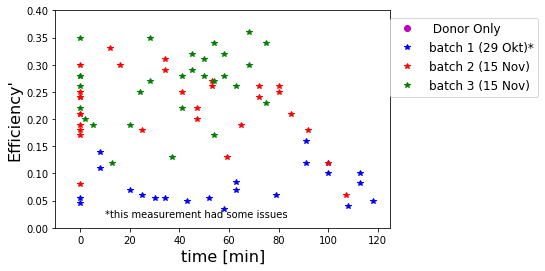

In [156]:
plt.plot(celldat['f1'][Donlycols], celldat['f3'][Donlycols], 'om', label = ' Donor Only')
plt.plot(celldat['f1'][batch1cols], celldat['f3'][batch1cols], '*b', label = 'batch 1 (29 Okt)*')
#add secondary population
plt.plot(celldat['f1'][batch1cols], celldat['f6'][batch1cols], '*b')
plt.plot(celldat['f1'][batch2cols], celldat['f3'][batch2cols], '*r', label = 'batch 2 (15 Nov)')
#add secondary population
plt.plot(celldat['f1'][batch2cols], celldat['f6'][batch2cols], '*r')
plt.plot(celldat['f1'][batch3cols], celldat['f3'][batch3cols], '*g', label = 'batch 3 (15 Nov)')
#add secondary population
plt.plot(celldat['f1'][batch3cols], celldat['f6'][batch3cols], '*g')

plt.xlim([-10,125])
plt.ylim([0,0.4])
plt.xlabel('time [min]', fontsize = 16)
plt.ylabel('Efficiency\'', fontsize = 16)
plt.text(10,0.02,'*this measurement had some issues')
plt.legend(fontsize = 12, loc = [1, 0.6])
plt.savefig('20191126_HeteroFRET_t_vs_E.png', dpi = 300, bbox_inches = 'tight')
plt.show

In [161]:
def EvsTau(tau, tau0):
    return 1 - tau/tau0

<function matplotlib.pyplot.show(*args, **kw)>

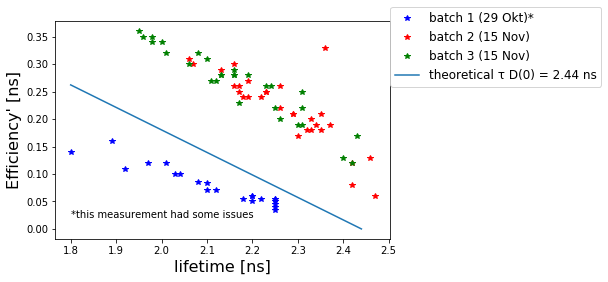

In [176]:
#plt.plot(celldat['f2'][Donlycols], celldat['f3'][Donlycols], 'om', label = ' Donor Only')
plt.plot(celldat['f2'][batch1cols], celldat['f3'][batch1cols], '*b', label = 'batch 1 (29 Okt)*')
#add secondary population
plt.plot(celldat['f5'][batch1cols], celldat['f6'][batch1cols], '*b')
plt.plot(celldat['f2'][batch2cols], celldat['f3'][batch2cols], '*r', label = 'batch 2 (15 Nov)')
#add secondary population
plt.plot(celldat['f5'][batch2cols], celldat['f6'][batch2cols], '*r')
plt.plot(celldat['f2'][batch3cols], celldat['f3'][batch3cols], '*g', label = 'batch 3 (15 Nov)')
#add secondary population
plt.plot(celldat['f5'][batch3cols], celldat['f6'][batch3cols], '*g')

#plt theoretical efficiency
tau = np.linspace(1.8, 2.44, 100)
tau0 = 2.44
E = EvsTau(tau, tau0)
plt.plot(tau, E, '-', label = 'theoretical \u03C4 D(0) = 2.44 ns')

#plt.xlim([-10,125])
#plt.ylim([0,0.4])
plt.xlabel('lifetime [ns]', fontsize = 16)
plt.ylabel('Efficiency\' [ns]', fontsize = 16)
plt.text(1.8,0.02,'*this measurement had some issues')
plt.legend(fontsize = 12, loc = [1, 0.7])
plt.savefig('20191126_HeteroFRET_E_vs_tau.png', dpi = 300, bbox_inches = 'tight')
plt.show

# exporting 1024 TACS from data

In [24]:
reload (IM)

<module 'ImageManipulation' from 'K:\\vanderVoortN\\FRC\\Code\\ImageManipulation.py'>

In [ ]:
wdir = r'N:\Singlem\singlem19-4\November\15_CD95_NB_NV\all'
outdir = r'N:\Singlem\singlem19-4\November\15_CD95_NB_NV\all\chisurf'

files = os.listdir(wdir)

for file in files:
    print(file[-4:])
    if file[-4:] != '.ptu':
        continue
    fname = os.path.join(wdir, file)
    print(fname)
    data = IM.processLifetimeImage(fname.encode(), uselines = np.array([1]), Gchan = np.array([0,1]), 
                                   Rchan = np.array([4,5]), 
                                   Ychan = np.array([4,5]), ntacs = 1024, TAC_range = 4096, \
                                   pulsetime = 50e-9, dwelltime = 1e-5)
    data.loadLifetime()
    GTACS = np.stack((np.arange(1024), data.getTACS(mode = 'G'))).transpose()
    data.gate(0,440)
    RTACS = np.stack((np.arange(1024), data.getTACS(mode = 'R'))).transpose()
    data.loadLifetime()
    data.gate(440,800)
    YTACS = np.stack((np.arange(1024), data.getTACS(mode = 'R'))).transpose()
    np.savetxt(os.path.join(outdir, file[:-4] + '_G.dat'), GTACS, fmt = '%i')
    np.savetxt(os.path.join(outdir, file[:-4] + '_R.dat'), RTACS, fmt = '%i')
    np.savetxt(os.path.join(outdir, file[:-4] + '_Y.dat'), YTACS, fmt = '%i')



In [199]:
def Donly(t, A, B, tau1, tau2, bg):
    return A * np.exp(-t/tau1) + B * np.exp(-t/tau2) + bg

def DA(t, A, x0, tau_fret, bg, D0):
    return A * ( (1-x0) * D0 * np.exp(- t / tau_fret) + x0 * D0) + bg

def eps(t, x0, tau_fret):
    return (1-x0) * np.exp(-t / tau_fret) + x0
    
def fitDonly(D0dat):
    Npoints = D0dat.shape[0]
    fittime = np.arange(Npoints) * dtime
    p0 = [np.max(D0dat)/2, np.max(D0dat)/2, 1, 3, 100]
    popt, pcov = curve_fit(Donly, fittime, D0dat, p0 = p0, sigma = np.sqrt(D0dat))
    Donlymodel = Donly(fittime, popt[0], popt[1], popt[2], popt[3], popt[4])
    Donly_base = Donly(fittime, popt[0] / ( popt[0] + popt[1] ), \
                            popt[1]/ ( popt[0] + popt[1]), popt[2], popt[3], 0)
    chi2red = np.sum( (D0dat-Donlymodel)**2 / D0dat) / (Npoints - 5)
    #print('chi2 reduced is %.2f' % chi2red)
    return popt, pcov, Donly_base, Donlymodel, chi2red

def fitDA (DAdat, D0dat):
    _, _, Donly_base, _, _ = fitDonly(D0dat)
    Npoints = D0dat.shape[0]
    fittime = np.arange(Npoints) * dtime
    p0 = [np.max(DAdat), 0.5, 2, 50]
    popt, pcov = curve_fit( lambda t, A, x0, kf, bg: DA(t, A, x0, kf, bg, Donly_base), \
                           fittime, DAdat, p0 = p0, sigma = np.sqrt(DAdat) )
    DAmodel = DA(fittime, *popt, Donly_base)
    chi2red = np.sum( (DAdat-DAmodel)**2 / DAdat) / (Npoints - 3)
    print('chi2 reduced is %.2f' % chi2red)
    return popt, pcov, DAmodel, chi2red

In [440]:
def plteps(ax, DAdat, D0dat, x0, tau_fret, bgrange = [320,420], makeplot = True, dtime = 0.064):
    #calc backgrounds
    bgest_DA = np.mean(DAdat[bgrange[0]:bgrange[1]])
    bgest_D0 = np.mean(D0dat[bgrange[0]:bgrange[1]])
    #define time axis
    Npoints = D0dat.shape[0]
    fittime = np.arange(Npoints) * dtime
    #calc epsilon
    epsdat = (DAdat - bgest_DA) / (D0dat- bgest_D0) * \
            max(D0dat-bgest_D0) / max(DAdat - bgest_DA)
    epsmod = eps(fittime, x0, tau_fret)
   
    #plot
    if makeplot:
        ax.plot(fittime, epsdat, label = '\u03B5(t)')
        ax.plot(fittime, epsmod, label = '\u03B5(t) fit')
        ax.set_xlim(0,20)
        ax.set_ylim(0.1,1.1)
        ax.set_xlabel('time(ns)')
        ax.set_ylabel('\u03B5D (t)')
        ax.legend()
        
def pltDA(ax, DAdat, D0dat, DAmodel, Donlymodel, file, popt, chi2red, chi2red_D0):
    ax.plot(fittime, DAdat, label = 'D(A)')
    ax.plot(fittime, D0dat, label = 'D(0)')
    ax.plot(fittime, DAmodel, 'r--', label = 'D(A) fit')
    ax.plot(fittime, Donlymodel, 'c--', label = 'D(0) fit')
    ax.set_yscale('log')
    ax.tick_params(direction='in', top=True, right=True)
    ax.tick_params(direction='in', labelbottom=False)

    ax.legend()
    #ax.set_xlabel('time (ns)')
    ax.set_ylabel('cnts')
    ax.set_xlim(0, 20)

    ax.text(0.5,100, 'x0: %.2f\n1/k_fret: %.2f ns \n\u03C72 D(A): %.2f\n\u03C72 D(0): %.2f'\
             % (popt[1], popt[2], chi2red, chi2red_D0), fontsize = 11)

In [201]:
def pltDA_eps(DAdat, D0dat, DAmodel, Donlymodel, file, popt, chi2red, chi2red_D0, outdir):
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(7, 6))
    fig.subplots_adjust(hspace=0)
    ax1 = plt.subplot(2,1,1)
    plt.title('FRET induced donor decay for %s' % file)
    pltDA(ax1, DAdat, D0dat, DAmodel, Donlymodel, file, popt, chi2red, chi2red_D0)
    plteps(ax2, DAdat, D0dat, popt[1], popt[2])
    plt.savefig(os.path.join(outdir,file[:-4]+'.png'), dpi = 300, bbox_inches = 'tight')
    plt.show()
    return 

In [474]:
popt_D0

array([1.05308095e+04, 1.73916470e+04, 1.50053055e+00, 2.65852782e+00,
       1.89209547e+02])

In [472]:
fracA = popt_D0[0]/(popt_D0[0]+popt_D0[1])
fracB = popt_D0[1]/(popt_D0[0]+popt_D0[1])
print(fracA, fracB)

0.3771448076854779 0.6228551923145221


analyzing file CD95-DeltaDD-2+L10_G.dat
chi2 reduced is 4.06
Donly fraction is 0.51 and FRET lifetime is 5.07 ns


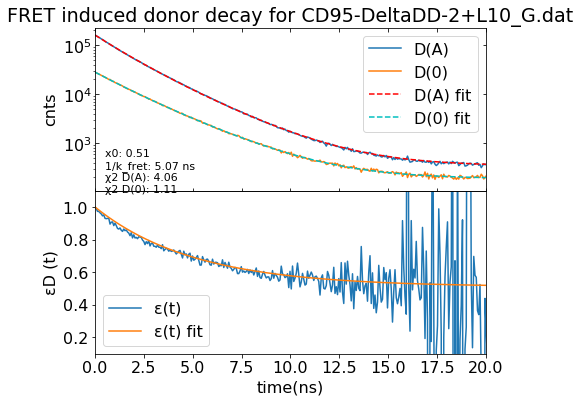

analyzing file CD95-DeltaDD-2+L11_G.dat
chi2 reduced is 5.80
Donly fraction is 0.51 and FRET lifetime is 5.40 ns


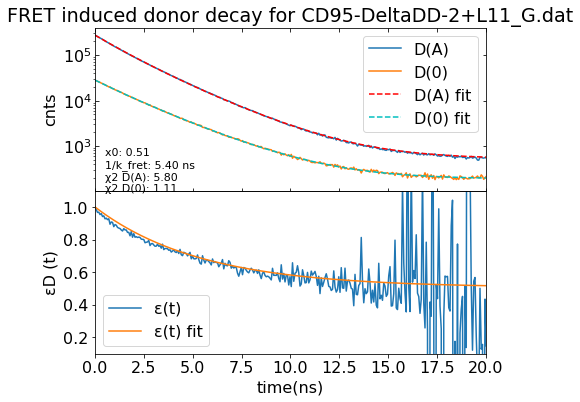

analyzing file CD95-DeltaDD-2+L12_G.dat
chi2 reduced is 16.74
Donly fraction is 0.53 and FRET lifetime is 4.61 ns


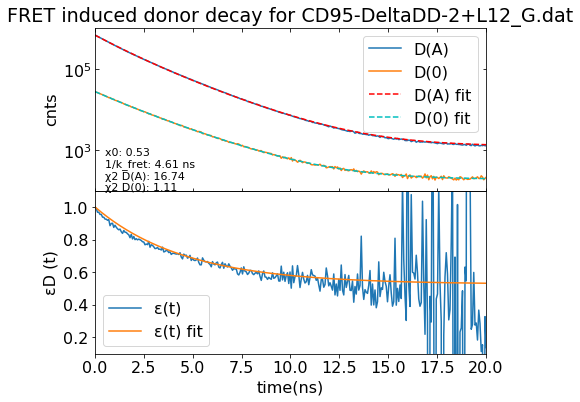

analyzing file CD95-DeltaDD-2+L13_G.dat
chi2 reduced is 13.37
Donly fraction is 0.50 and FRET lifetime is 4.75 ns


KeyboardInterrupt: 

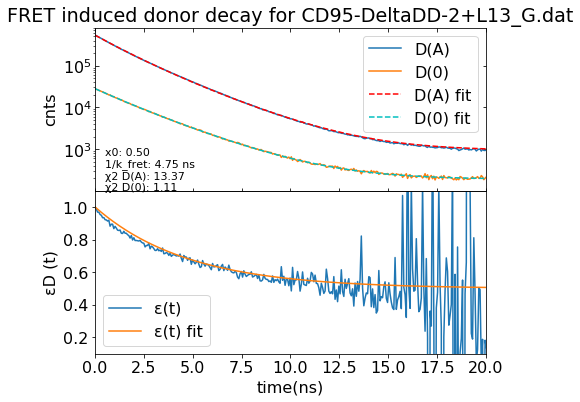

In [468]:
wdir = r'N:\Singlem\singlem19-4\November\15_CD95_NB_NV\all\run2_tacs'
outdir = r'N:\\Singlem\\singlem19-4\\November\\15_CD95_NB_NV\\all\\run2_tacs\\results'
matplotlib.rcParams.update({'font.size': 16})

files = os.listdir(wdir)
##global 
dtime = 0.064

#fit Donly
D0_3dat = np.genfromtxt(os.path.join(wdir, 'Donly3_G.dat'))
D0dat = D0_3dat[30:600,1]
popt_D0,_,Donly_base, Donlymodel, chi2red_D0 = fitDonly(D0dat)

names = []
S_y = []
x0 = []
tau_fret = []
chi2red_lst = []

for file in files:
    #skip non-green files and Donly files
    if file[-6:] != '_G.dat' or file[:5] == 'Donly':
        continue
        
    names.append(file[:-6])
    #get brightness of Yellow signal
    S_y.append(np.sum(np.genfromtxt(os.path.join(wdir, file[:-6]+'_Y.dat'))[30:600,1]))
    #fit D(A)
    print('analyzing file %s' % file)
    DAdat = np.genfromtxt( os.path.join(wdir, file))[30:600,1]
    popt, pcov, DAmodel, chi2red = fitDA(DAdat, D0dat)
    x0.append(popt[1])
    tau_fret.append(popt[2])
    chi2red_lst.append(chi2red)
    #plot and store
    print('Donly fraction is %.2f and FRET lifetime is %.2f ns' % (popt[1], popt[2]))
    pltDA_eps(DAdat, D0dat, DAmodel, Donlymodel, file, popt, chi2red, chi2red_D0, outdir)
#times for Chisurf folder
    #times = [59, 65, 72, 80, 85, 92, 100, 107,4, 12, 16, 25, 31, 34, 41, 47, 53, 45, 50, 
#         54, 58, 63, 68, 75, 2, 5, 13, 20, 24, 28, 32, 37, 41, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#run2 only
times = [45, 50, 54, 58, 63, 68, 75, 2, 5, 13, 20, 24, 28, 32, 37, 41, 0, 0, 0]

In [265]:
k_fret = 1 / np.array(tau_fret)
x_fret = 1 - np.array(x0)


<function matplotlib.pyplot.show(*args, **kw)>

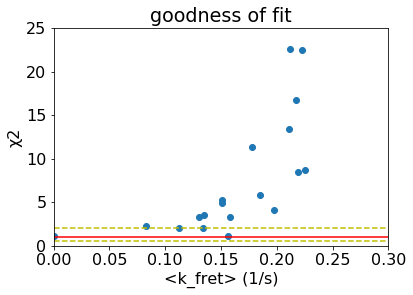

In [442]:
outdir = r'P:\\CD95\\reports\\20191212deltaDD_DonorCalibratedAnalysis'
plt.scatter(k_fret, chi2red_lst)
plt.plot([0,1],[1,1], 'r')
plt.plot([0,1],[2,2], 'y--')
plt.plot([0,1],[0.5, 0.5], 'y--')
plt.ylim(0,25)
plt.xlim(0,.3)
plt.xlabel('<k_fret> (1/s)')
plt.ylabel('\u03C72')
plt.title('goodness of fit')
plt.savefig(os.path.join(outdir, 'goodness_of_fit.png'), dpi = 300, bbox_inches = 'tight')
plt.show

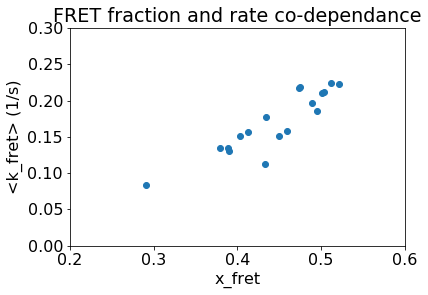

In [443]:
plt.scatter(1-np.array(x0), 1/np.array(tau_fret))
plt.ylim(0,.3)
plt.xlim(0.2,0.6)
plt.xlabel('x_fret')
plt.ylabel('<k_fret> (1/s)')
plt.title('FRET fraction and rate co-dependance')
plt.savefig(os.path.join(outdir, 'RateAndFractionCoDependance.png'), dpi = 300, bbox_inches = 'tight')
plt.show()

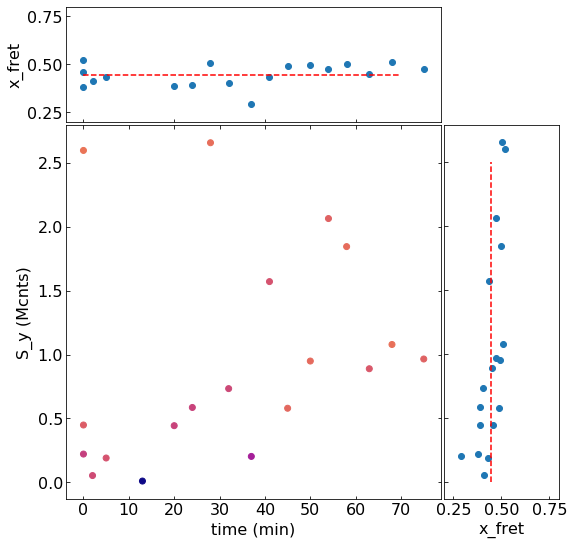

In [444]:
tot = 0
n = 0
for el in x_fret:
    if el < 1 and el > 0:
        tot += el
        n+=1
mn = tot / n

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(times, np.array(S_y)/1e6, c = x_fret, vmin = 0, vmax = 0.8, cmap = 'plasma')
ax_scatter.set_xlabel('time (min)')
ax_scatter.set_ylabel('S_y (Mcnts)')
ax_scatter.set_xticks(tticks)


#attempts to integrate colorbar failed, debree code:
#cbaxes = inset_axes(ax_scatter,
#                    width="50%",  # width = 50% of parent_bbox width
#                    height="5%",  # height : 5%
#                    loc='upper left',
#                    bbox_transform=ax_scatter.transAxes)
#cbaxes = ax_scatter.inset_axes([0.1, 0.1, 0.8, 0.1], frameon = False)
#fig.colorbar(sc, ax = cbaxes, orientation = 'horizontal')
#axins1.xaxis.set_ticks_position("bottom")

ax_histx.scatter(times, x_fret)
ax_histy.scatter(x_fret, S_y)



ax_histx.set_ylim(0.2,.8)
ax_histx.plot([0,70],[mn, mn], 'r--')
ax_histx.set_ylabel('x_fret')
ax_histy.set_xlim(0.2,.8)
ax_histy.plot([mn,mn],[0,2500000], 'r--')
ax_histy.set_xlabel('x_fret')
plt.savefig(os.path.join(outdir, 'x_fret.png'), dpi = 300, bbox_inches = 'tight')
plt.show()




<function matplotlib.pyplot.show(*args, **kw)>

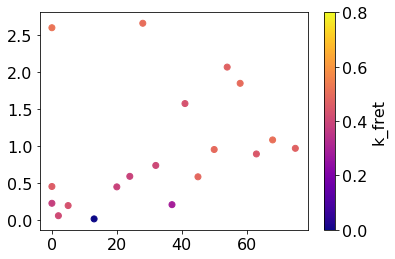

In [447]:

plt.scatter(times, np.array(S_y)/1e6, c = x_fret, vmin = 0, vmax = 0.8, cmap = 'plasma')
cbar = plt.colorbar()
cbar.set_label('k_fret')
plt.savefig(os.path.join(outdir, 'x_fret_cbar+unclean.png'), dpi = 300, bbox_inches = 'tight')
plt.show

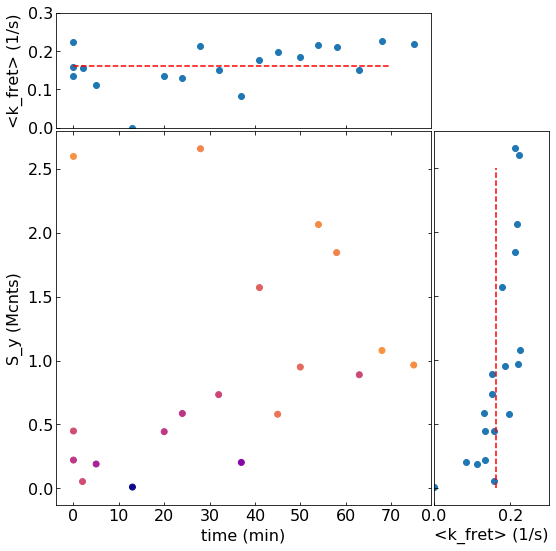

In [445]:
tot = 0
n = 0
for el in k_fret:
    if el < 2 and el > 0:
        tot += el
        n+=1
mn = tot / n

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(times, np.array(S_y)/1e6, c = k_fret, vmin = 0, vmax = 0.3, cmap = 'plasma')
ax_scatter.set_xlabel('time (min)')
ax_scatter.set_ylabel('S_y (Mcnts)')
ax_scatter.set_xticks(tticks)

ax_histx.scatter(times, k_fret)
ax_histy.scatter(k_fret, S_y)



ax_histx.set_ylim(0,.3)
ax_histx.plot([0,70],[mn, mn], 'r--')
ax_histx.set_ylabel('<k_fret> (1/s)')
ax_histy.set_xlim(0,.3)
ax_histy.plot([mn,mn],[0,2500000], 'r--')
ax_histy.set_xlabel('<k_fret> (1/s)')
plt.savefig(os.path.join(outdir, 'k_fret.png'), dpi = 300, bbox_inches = 'tight')
plt.show()




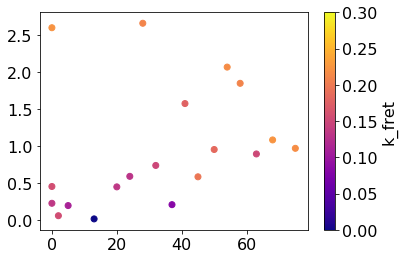

In [446]:

plt.scatter(times, np.array(S_y)/1e6, c = k_fret, vmin = 0, vmax = 0.3, cmap = 'plasma')
cbar = plt.colorbar()
cbar.set_label('k_fret')
plt.savefig(os.path.join(outdir, 'k_fret_cbar+unclean.png'), dpi = 300, bbox_inches = 'tight')
plt.show


In [463]:
cell_example = IM.processLifetimeImage(os.path.join(wdir, 'CD95-DeltaDD-2+L5.ptu').encode(), uselines = np.array([1]), Gchan = np.array([0,1]), 
                                   Rchan = np.array([4,5]), 
                                   Ychan = np.array([4,5]), ntacs = 1024, TAC_range = 4096, \
                                   pulsetime = 50e-9, dwelltime = 2e-5)

header dir already exists
b'N:\\Singlem\\singlem19-4\\November\\15_CD95_NB_NV\\all\\header\\CD95-DeltaDD-2+L5.txt'
number of records is 26219772
dwelltime not found in header, using user-set value


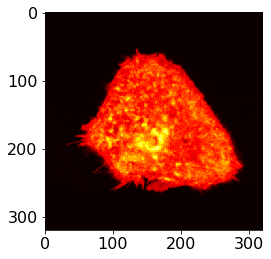

In [467]:
plt.imshow(cell_example.baseIntensity.G, cmap = 'hot')
plt.savefig(os.path.join(outdir, 'cell_run2_+L5_G.png'), dpi = 300, bbox_inches = 'tight')